In [115]:
import pandas as pd
import datetime
import pprint
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [116]:
select_all_in_folder = True
EXPORT_TO_CSV=True
REGEX_MATCHING = True

In [117]:
columns = ["time","priority","class","message","extra"]
date = "2021-05-23-2"
folders = ["messwerte-notify-new/","messwerte-2021-05-25/"]
#folders = ["messwerte-2021-05-25/"]
# notify-records folder contains old notify values, which are transfered with to smal data!
filename_app = date+".log"
filename_hci = folders[0] + "hci-"+date+".csv"
device_macs = [mac.lower() for mac in ["24:0A:C4:61:78:D2","24:0A:C4:60:EF:3A","24:0A:C4:60:E5:D2"]]

In [118]:
df = pd.DataFrame()
if select_all_in_folder:
    for folder in folders:
        for filename_tmp in os.listdir(folder):
            print(filename_tmp)
            if filename_tmp.startswith("ubertooth") and filename_tmp.endswith(".csv"):
                df = df.append(pd.read_csv(folder+filename_tmp,encoding='latin1'))
                print("Added")
else:
    df = pd.read_csv(filename_hci,encoding='latin1')
df_original = df
df

hci-notify.csv
ci_256.pcapng
hci_ci_64.csv
hci_ci_36.csv
ubertooth_ci_36.csv
Added
ubertooth_ci_64.csv
Added
hci_ci_256.csv
ci_64.pcapng
ubertooth_ci_256.csv
Added
ci_36.pcapng


,No.,Time,Source,Destination,Protocol,Length,Request in Frame,RF Channel,Opcode,Value,Handle,Info,Time.1,UUID
0,1,0,88.221.60.168,192.168.143.64,TLSv1.2,92,NaN,NaN,NaN,NaN,NaN,Application Data,"2021-05-25 15:38:25,659317240",NaN
1,2,5.8937e-05,192.168.143.64,88.221.60.168,TCP,66,NaN,NaN,NaN,NaN,NaN,42802 > 443 [ACK] Seq=1 Ack=25 Win=501 Len=0...,"2021-05-25 15:38:25,659376177",NaN
2,3,4.49e-07,88.221.60.168,192.168.143.64,TCP,68,NaN,NaN,NaN,NaN,NaN,"443 > 42802 [FIN, ACK] Seq=25 Ack=1 Win=501 ...","2021-05-25 15:38:25,659317689",NaN
3,4,3.86674,48:a5:89:1e:a8:97,Broadcast,LE LL,43,NaN,0.0,NaN,NaN,NaN,ADV_IND,"2021-05-25 15:38:29,526056637",NaN
4,5,0.000321835,192.168.143.64,88.221.60.168,TCP,66,NaN,NaN,NaN,NaN,NaN,"42802 > 443 [FIN, ACK] Seq=1 Ack=26 Win=501 ...","2021-05-25 15:38:25,659639075",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,4791,567.690537500,Unknown_0x506544e1,Unknown_0x506544e1,LE LL,19,NaN,36.0,NaN,NaN,NaN,Empty PDU,"2021-05-26 14:01:06,756717203",NaN
4791,4792,340.875130271,192.168.143.64,162.254.197.54,TLSv1.2,121,NaN,NaN,NaN,NaN,NaN,Application Data,"2021-05-26 13:57:19,941309974",NaN
4792,4793,340.956100257,162.254.197.54,192.168.143.64,TCP,56,NaN,NaN,NaN,NaN,NaN,27028 > 43065 [ACK] Seq=2877 Ack=1392 Win=10...,"2021-05-26 13:57:20,022279960",NaN
4793,4794,341.183642301,162.254.197.54,192.168.143.64,TLSv1.2,251,NaN,NaN,NaN,NaN,NaN,Application Data,"2021-05-26 13:57:20,249822004",NaN


In [119]:
print('sources:%s'%list(set(df['Source'].values)))
print('protocols:%s'%list(set(df['Protocol'].values)))

print('Opcodes:%s'%list(set(df['Opcode'].values)))
print('Handles:%s'%list(set(df['Handle'].values)))
pprint.pprint('Infos:%s'%list(set(df['Info'].values)))

sources:[nan, '2001:16b8:265c:de00:3a10:d5ff:fed1:c556', '1f:6a:d0:04:1f:31', '67:00:7c:f7:0f:ef', '6a:a0:6b:3a:2b:52', 'Etrali_b6:64:ea', '48:45:d0:1f:99:69', '31:ac:7c:33:30:d8', '56:1f:6a:55:92:f6', '6b:28:69:36:6b:52', '68:1a:f1:23:f8:8f', '48:05:f0:3f:99:6a', '3e:e9:e3:25:ba:b5', 'TexasIns_3f:8f:68', '157.245.213.92', '17:45:5f:01:cb:10', '6a:28:6b:36:2b:52', '7b:01:84:26:3f:45', '48:05:f0:df:99:6a', '192.168.143.21', '7b:37:ae:a3:9a:88', '6a:28:69:36:27:50', '192.168.143.68', '48:c1:f0:6d:99:7a', '4c:05:f0:5f:99:6b', '2a00:1450:4005:802::2003', '2f:a2:3a:01:f2:e9', '7e:65:84:d1:17:30', 'TexasIns_3d:c7:28', '41:e4:18:86:e5:58', '3e:e9:e2:25:ba:a5', '4b:b6:64:ee:74:d4', '36:e0:03:25:ba:b5', '192.168.143.64', '48:05:70:0f:99:6a', 'ff:29:62:25:be:b5', '6a:28:6b:36:29:52', '0c:65:cf:3f:cf:28', '34.195.98.176', '5e:90:cb:cc:af:56', 'd3:f0:98:7d:4e:f0', '07:e4:98:84:e0:59', '7b:11:84:16:3b:47', '0c:61:df:3f:cb:08', 'CsTeleco_0d:c7:72', '4c:b8:33:6a:f4:ec', 'fe80::58a6:d1c1:5af1:a457', '

 '_googlecast._tcp.local, "QM" question\', \'[TCP Keep-Alive] 37058  >  443 '
 "[ACK] Seq=657 Ack=793 Win=64128 Len=0 TSval=436456495 TSecr=2909273121', "
 "'[TCP Dup ACK 65#2] [TCP ACKed unseen segment] 5228  >  46988 [ACK] Seq=1 "
 "Ack=2 Win=265 Len=0 TSval=3291683697 TSecr=3572339348', 'Standard query "
 "response 0xcedf AAAA ssl.gstatic.com AAAA 2a00:1450:4001:80f::2003', '[TCP "
 'ACKed unseen segment] 5228  >  43090 [ACK] Seq=1 Ack=28 Win=265 Len=0 '
 "TSval=3081989417 TSecr=2689630179', 'Initial, SCID=77a8104243eb7e25, PKN: "
 "4120324, ACK, PADDING', 'Who has 192.168.143.1? Tell 192.168.143.64', "
 "'35186  >  443 [ACK] Seq=1 Ack=508 Win=501 Len=0 TSval=2787523798 "
 "TSecr=1204849589', 'Standard query 0x0044 PTR "
 '_CC32E753._sub._googlecast._tcp.local, "QM" question PTR '
 '_googlecast._tcp.local, "QM" question\', \'80  >  37350 [FIN, ACK] Seq=220 '
 "Ack=99 Win=64256 Len=0 TSval=2970858856 TSecr=3744022404', '[TCP Dup ACK "
 '285#1] [TCP ACKed unseen segment] 443  >  54940

In [120]:
df[df['Protocol'].str.contains("ATT")]

,No.,Time,Source,Destination,Protocol,Length,Request in Frame,RF Channel,Opcode,Value,Handle,Info,Time.1,UUID
1216,1217,17.3759,Unknown_0x50657d91,Unknown_0x50657d91,ATT,30,NaN,5.0,Read By Group Type Request,NaN,NaN,"UnknownDirection Read By Group Type Request, G...","2021-05-25 15:38:43,035249537",NaN
1219,1220,17.4262,Unknown_0x50657d91,Unknown_0x50657d91,ATT,37,1217.0,19.0,Read By Group Type Response,NaN,"0x0001,0x0014","UnknownDirection Read By Group Type Response, ...","2021-05-25 15:38:43,085550237",NaN
1220,1221,17.4759,Unknown_0x50657d91,Unknown_0x50657d91,ATT,30,NaN,7.0,Read By Group Type Request,NaN,NaN,"UnknownDirection Read By Group Type Request, G...","2021-05-25 15:38:43,135251037",NaN
1223,1224,17.5263,Unknown_0x50657d91,Unknown_0x50657d91,ATT,45,1221.0,7.0,Read By Group Type Response,NaN,0x0028,"UnknownDirection Read By Group Type Response, ...","2021-05-25 15:38:43,185576137","26cb2f28a4ba49fc856ad57fe4d3dada,dadad3e47fd56..."
1224,1225,17.5759,Unknown_0x50657d91,Unknown_0x50657d91,ATT,30,NaN,21.0,Read By Type Request,NaN,NaN,"UnknownDirection Read By Type Request, GATT In...","2021-05-25 15:38:43,235252637",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,4755,557.770299000,Unknown_0x506544e1,Unknown_0x506544e1,ATT,24,4752.0,29.0,Write Response,NaN,0x002e,"UnknownDirection Write Response, Handle: 0x002...","2021-05-26 14:00:56,836478703",f341082200c04dd3a60b3cd6124fd323
4760,4761,558.730105000,Unknown_0x506544e1,Unknown_0x506544e1,ATT,26,NaN,19.0,Read Request,NaN,0x002a,"UnknownDirection Read Request, Handle: 0x002a ...","2021-05-26 14:00:57,796284703",fbdc45f28337467b8019e7db05355215
4775,4776,563.850243800,Unknown_0x506544e1,Unknown_0x506544e1,ATT,26,NaN,13.0,Read Request,NaN,0x002a,"UnknownDirection Read Request, Handle: 0x002a ...","2021-05-26 14:01:02,916423503",fbdc45f28337467b8019e7db05355215
4776,4777,564.490253000,Unknown_0x506544e1,Unknown_0x506544e1,ATT,28,NaN,20.0,Read Blob Request,NaN,0x002a,"UnknownDirection Read Blob Request, Handle: 0x...","2021-05-26 14:01:03,556432703",fbdc45f28337467b8019e7db05355215


### Reduce Dataframe on only Rows of active conection

In [121]:
df['Source'] = df['Source'].astype(str)
df['Source'] = df['Source'].fillna("")
unknown_sources = [addr for addr in list(set(df['Source'].values)) if addr.startswith("Unknown_")]
print("all: ",df.shape)
print("filter on %s"%unknown_sources)
df = df[df['Source'].apply(lambda src:src in unknown_sources)]
print("filtered: ",df.shape)

all:  (32781, 14)
filter on ['Unknown_0xaf9a85a5', 'Unknown_0x50657d91', 'Unknown_0x506544e1', 'Unknown_0x506574d7']
filtered:  (25313, 14)


### Clean Data

In [122]:
try:
    print("Types:\n%s"%df.dtypes)
    df = df.drop(['Source','Destination','Protocol'],axis=1)
    df['Info'] = df['Info'].astype(str)
    df['Info'] = df['Info'].fillna("")
    df['Value'] = df['Value'].astype(str)
    df['Value'] = df['Value'].fillna("")
    df['Opcode'] = df['Opcode'].astype(str)
    df['Opcode'] = df['Opcode'].fillna("")
    df['Handle'] = df['Handle'].astype(str)
    df['Handle'] = df['Handle'].fillna("")
    df['UUID'] = df['UUID'].astype(str)
    df['UUID'] = df['UUID'].fillna("")
    print("Cleaned:\n%s"%df.dtypes)
except:
    pass

Types:
No.                   int64
Time                 object
Source               object
Destination          object
Protocol             object
Length                int64
Request in Frame    float64
RF Channel          float64
Opcode               object
Value                object
Handle               object
Info                 object
Time.1               object
UUID                 object
dtype: object
Cleaned:
No.                   int64
Time                 object
Length                int64
Request in Frame    float64
RF Channel          float64
Opcode               object
Value                object
Handle               object
Info                 object
Time.1               object
UUID                 object
dtype: object


### Add Time

In [123]:
df = df[~df['Time.1'].str.contains("REF")]

In [124]:
df["Time.1"] = pd.to_datetime(df["Time.1"],format="%Y-%m-%d %H:%M:%S,%f")+ pd.Timedelta(hours=1)
df.sort_values("Time.1",inplace=True)
df

,No.,Time,Length,Request in Frame,RF Channel,Opcode,Value,Handle,Info,Time.1,UUID
1204,1205,17.0847,31,NaN,0.0,nan,nan,nan,Control Opcode: Unknown,2021-05-25 16:38:42.744037337,nan
1205,1206,17.0869,72,NaN,0.0,nan,nan,nan,L2CAP Fragment Start,2021-05-25 16:38:42.746248137,nan
1206,1207,17.1259,19,NaN,15.0,nan,nan,nan,Empty PDU,2021-05-25 16:38:42.785247037,nan
1207,1208,17.1262,25,NaN,15.0,nan,nan,nan,Control Opcode: LL_VERSION_IND,2021-05-25 16:38:42.785475737,nan
1208,1209,17.1759,28,NaN,3.0,nan,nan,nan,Control Opcode: LL_FEATURE_REQ,2021-05-25 16:38:42.835247837,nan
...,...,...,...,...,...,...,...,...,...,...,...
4786,4787,567.050520000,19,NaN,18.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.116699703,nan
4787,4788,567.370295500,19,NaN,27.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.436475203,nan
4788,4789,567.370524400,19,NaN,27.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.436704103,nan
4789,4790,567.690309300,19,NaN,36.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.756489003,nan


In [125]:
print('Opcodes:%s'%list(set(df['Opcode'].values)))

Opcodes:['Handle Value Indication', 'Read By Group Type Response', 'Error Response', 'Read By Type Response', 'Exchange MTU Response', 'Read Blob Response', 'nan', 'Read Blob Request', 'Read By Group Type Request', 'Read Response', 'Find Information Request', 'Read Multiple Request', 'Find Information Response', 'Write Response', 'Exchange MTU Request', 'Read Request', 'Write Request', 'Read By Type Request']


### Resolve Handles

In [126]:
uuid_map = dict({"26cb2f28-a4ba-49fc-856a-d57fe4d3dada":"SERVICE_UUID_MAIN",
"fbdc45f2-8337-467b-8019-e7db05355215":"CHARACTERISTIC_UUID_READ",
"8c65f73d-ddab-4dd9-a2e0-f5a10ce7e252":"CHARACTERISTIC_UUID_WRITE_COMMAND",
"f3410822-00c0-4dd3-a60b-3cd6124fd323":"CHARACTERISTIC_UUID_WRITE_SIZE",
"1ee1d0fc-6f3c-4c6a-ac1c-c54d2a97f932":"CHARACTERISTIC_UUID_NOTIFY",
"83157f66-7c91-431e-a037-7c2b9e594ef6":"CHARACTERISTIC_UUID_INDICATE",
"46ac40cc-7eaa-41a9-9964-956a984fd9c3":"CHARACTERISTIC_UUID_CONN_INTERVAL"})
uuid_map = {k.replace("-",""):v.replace("CHARACTERISTIC_UUID_","") for k,v in uuid_map.items()}
handle_map = dict()
def resolve_handles(df):
    df_read_by_type_response = df[df['Opcode'].str.startswith("Read By Type Response")][['Handle','UUID']]
    for i,row in df_read_by_type_response.iterrows():
        handles = row['Handle'].split(",")
        uuids = row['UUID'].split(",")
        for i in range(0,min(len(handles),len(uuids))):
            handle = handles[i]
            uuid = uuids[i]
            if uuid in uuid_map.keys():
                handle_map[handle] = uuid_map[uuid]
    print("unresolved characteristics:",[char for uuid,char in uuid_map.items() if char not in handle_map.values()])
resolve_handles(df)
print(handle_map)

unresolved characteristics: ['SERVICE_UUID_MAIN']
{'0x002a': 'READ', '0x002c': 'WRITE_COMMAND', '0x002e': 'WRITE_SIZE', '0x0030': 'NOTIFY', '0x0033': 'CONN_INTERVAL', '0x0035': 'INDICATE'}


In [127]:
# handle_map['0x002a'] = 'READ'

 ### Add Packettypes

In [128]:
def checkPaketType(row):  
    handle = row['Handle']
    if row['Info'].startswith("Empty PDU"):
        return "Channel Hop"
    elif len(handle) > 0:
        opcode = row['Opcode']
        if handle in handle_map.keys():
            pakettype = handle_map[handle]
            isSent = any([r in row['Info'] for r in ['Request','Req','REQ']])
            if isSent:
                return pakettype + " Req"
            else:
                return pakettype + " Rcvd"
        
        if opcode.startswith("Exchange MTU"):
            return opcode
    return ""

df['Pakettype'] = df.apply(axis=1,func = checkPaketType)
print('Pakettypes:%s'%list(set(df['Pakettype'].values)))
df

Pakettypes:['', 'READ Rcvd', 'Exchange MTU Response', 'WRITE_SIZE Rcvd', 'INDICATE Rcvd', 'CONN_INTERVAL Rcvd', 'CONN_INTERVAL Req', 'Exchange MTU Request', 'WRITE_SIZE Req', 'READ Req', 'Channel Hop']


,No.,Time,Length,Request in Frame,RF Channel,Opcode,Value,Handle,Info,Time.1,UUID,Pakettype
1204,1205,17.0847,31,NaN,0.0,nan,nan,nan,Control Opcode: Unknown,2021-05-25 16:38:42.744037337,nan,
1205,1206,17.0869,72,NaN,0.0,nan,nan,nan,L2CAP Fragment Start,2021-05-25 16:38:42.746248137,nan,
1206,1207,17.1259,19,NaN,15.0,nan,nan,nan,Empty PDU,2021-05-25 16:38:42.785247037,nan,Channel Hop
1207,1208,17.1262,25,NaN,15.0,nan,nan,nan,Control Opcode: LL_VERSION_IND,2021-05-25 16:38:42.785475737,nan,
1208,1209,17.1759,28,NaN,3.0,nan,nan,nan,Control Opcode: LL_FEATURE_REQ,2021-05-25 16:38:42.835247837,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...
4786,4787,567.050520000,19,NaN,18.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.116699703,nan,Channel Hop
4787,4788,567.370295500,19,NaN,27.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.436475203,nan,Channel Hop
4788,4789,567.370524400,19,NaN,27.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.436704103,nan,Channel Hop
4789,4790,567.690309300,19,NaN,36.0,nan,nan,nan,Empty PDU,2021-05-26 15:01:06.756489003,nan,Channel Hop


In [129]:
print("All: ",df.shape)
print("With Pakettype: ",df[df['Pakettype'].apply(lambda st:len(st)>0)].shape)
print("Without Pakettype: ",df[df['Pakettype'].apply(lambda st:len(st) == 0)].shape)
df[df['Pakettype'].apply(lambda st:len(st) == 0)]
df = df[df['Pakettype'].apply(lambda st:len(st)>0)]

All:  (25312, 12)
With Pakettype:  (24916, 12)
Without Pakettype:  (396, 12)


### Define Hops

In [130]:
df_hops = df[df['Pakettype'].str.contains("Channel Hop")]
df_hops = df_hops.drop(["Opcode","Value","Handle","Info","UUID"],axis=1)
df_hops

,No.,Time,Length,Request in Frame,RF Channel,Time.1,Pakettype
1206,1207,17.1259,19,NaN,15.0,2021-05-25 16:38:42.785247037,Channel Hop
1211,1212,17.2262,19,NaN,3.0,2021-05-25 16:38:42.885524737,Channel Hop
1212,1213,17.2759,19,NaN,17.0,2021-05-25 16:38:42.935249237,Channel Hop
1215,1216,17.3264,19,NaN,5.0,2021-05-25 16:38:42.985669337,Channel Hop
1225,1226,17.6259,19,NaN,9.0,2021-05-25 16:38:43.285253237,Channel Hop
...,...,...,...,...,...,...,...
4786,4787,567.050520000,19,NaN,18.0,2021-05-26 15:01:06.116699703,Channel Hop
4787,4788,567.370295500,19,NaN,27.0,2021-05-26 15:01:06.436475203,Channel Hop
4788,4789,567.370524400,19,NaN,27.0,2021-05-26 15:01:06.436704103,Channel Hop
4789,4790,567.690309300,19,NaN,36.0,2021-05-26 15:01:06.756489003,Channel Hop


(22550, 8)


Text(0.5, 1.0, 'Channel hops')

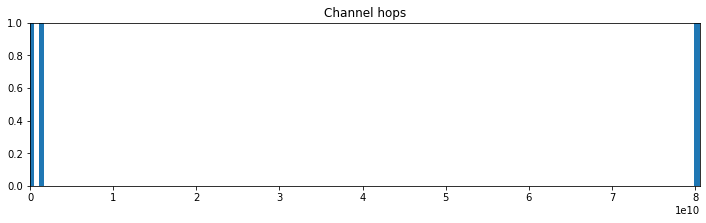

In [131]:
ref_time = df_hops.iloc[0]['Time.1']
df_hops['microseconds diff'] = df_hops['Time.1'].apply(lambda dt:dt-ref_time).apply(lambda dt:dt.microseconds + dt.seconds*1_000_000)
df_hops
print(df_hops.shape)
fig, ax = plt.subplots(figsize=(12,3))
plt.xlim(0,df_hops['microseconds diff'].max())
plt.ylim(0,1)
plt.vlines(df_hops['microseconds diff'],0,1)
plt.title("Channel hops")

### Define Settings

In [132]:
df = df[~df['Pakettype'].str.contains("Channel Hop")]
print(df.shape)

(2366, 12)


In [133]:
print("Requests: %d"%df[df['Opcode'].str.contains("Read Request")].shape[0])
print("Responses: %d"%df[df['Opcode'].str.contains("Read Response")].shape[0])

Requests: 265
Responses: 224


In [134]:
def hex_string_to_int(string,reverse=True):
    if reverse:
        string = "".join(reversed([string[i:i+2] for i in range(0, len(string),2)]))
    print(string,"->",int(string,16))
    return int(string,16)

In [135]:

#setting updates
size_updates = []
connection_interval_updates = []
mtu_updates = []
df_size_updates = df[df['Pakettype'].str.contains("WRITE_SIZE")]
df_connection_interval_updates = df[df['Pakettype'].str.contains("CONN_INTERVAL")]
df_mtu_updates = df[df['Pakettype'].str.contains("Exchange MTU")]
indices_to_drop = set(list(df_size_updates.index.values)+list(df_connection_interval_updates.index.values)+list(df_mtu_updates.index.values))
print("drop following:",indices_to_drop)
df = df.drop(indices_to_drop)

df_size_updates = df_size_updates [df_size_updates ['Pakettype'].str.contains("Req")]
size_updates = [(dt,hex_string_to_int(val,True)) for dt,val in zip(df_size_updates['Time.1'].values,df_size_updates['Value'].values)]
size_updates.sort(key=lambda pair:pair[0])
print("Size Updates:")
pprint.pprint(size_updates)

df_connection_interval_updates = df_connection_interval_updates[df_connection_interval_updates['Pakettype'].str.contains("Req")]
connection_interval_updates = [(dt,hex_string_to_int(val,True)) for dt,val in zip(df_connection_interval_updates['Time.1'].values,df_connection_interval_updates['Value'].values)]
connection_interval_updates += [(np.datetime64('2021-05-28T11:50:15.673801245'),64)]
connection_interval_updates.sort(key=lambda pair:pair[0])

print("Interval Updates:")
pprint.pprint(connection_interval_updates)

df_mtu_updates =df_mtu_updates [df_mtu_updates['Pakettype'].str.contains("Request")]
mtu_updates = [(dt,int(val)) for dt,val in zip(df_mtu_updates['Time.1'].values,df_mtu_updates['Info'].apply(lambda st: st.split(":")[-1]).values)]
mtu_updates.sort(key=lambda pair:pair[0])
print("MTU Updates:")
pprint.pprint(mtu_updates)
print(df.shape)


drop following: {10240, 4609, 8712, 4109, 8718, 8719, 4112, 8722, 8220, 8222, 10787, 10790, 13351, 10281, 13354, 10283, 1588, 4662, 1591, 4665, 3643, 2108, 3648, 5699, 2116, 5702, 2119, 9288, 9289, 2634, 2123, 2636, 9292, 4170, 4173, 4681, 4684, 1108, 1110, 3579, 6240, 6243, 3582, 9834, 12395, 9837, 12397, 3700, 10869, 2680, 2682, 5756, 1662, 5759, 1664, 5247, 5250, 5256, 5259, 4751, 4754, 2196, 4246, 2199, 4248, 1178, 12442, 11420, 1180, 3229, 11423, 4256, 12445, 12447, 12449, 4261, 3751, 13991, 13993, 3754, 11956, 11959, 7870, 6847, 6849, 7873, 705, 708, 10440, 10447, 6352, 6355, 8406, 8409, 8415, 8416, 3303, 10986, 3306, 10989, 11505, 11508, 3327, 3330, 13062, 13065, 12053, 8469, 1303, 12058, 8474, 1306, 2331, 8990, 1821, 2336, 8993, 1824, 5411, 10523, 5415, 820, 10037, 823, 7481, 6458, 10042, 3902, 4415, 7488, 3905, 4418, 4427, 11598, 9040, 4945, 9043, 4950, 12637, 4449, 13666, 4452, 13669, 9577, 9579, 10603, 10606, 12142, 3950, 3953, 12147, 3444, 12662, 3447, 11128, 11131, 10620, 

### Define Read & Notify Requests NO REGEX WAY

In [136]:
%run UbertoothHelpClasses.ipynb

Data Size 64mnopqrstuvwxyzabcdefghijklmnopqrstuvwxyzabcdefghijkl 64
72


In [137]:
if not REGEX_MATCHING:
    read_requests = []
    latest_request = None
    df_reads = df[df['Pakettype'].str.contains("READ")]
    df_reads.sort_values("Time.1",inplace=True)
    if len(df_reads.index.values) > 0:
        for i,row in df_reads.iterrows():
            print(i,row['Time.1'],row['Pakettype'],row['Opcode'],row['Request in Frame'],row['Value'])
            if latest_request is None:
                latest_request = Request(row['Pakettype'])
                print("new Request %d"%len(read_requests))
            opcode = row['Opcode']
            read_row = row
            pakettype = row['Pakettype']

            if 'Read Blob' in opcode:
                latest_request.add(read_row)
                if 'Response' in opcode:
                    latest_request.state_pause()
            elif 'Read Response' in opcode:
                latest_request.state_pause()
                latest_request.add(read_row)
            elif 'Read Request' in opcode:
                if latest_request.state == "pause":
                    latest_request.state_close()
                    if(latest_request.isValid):
                        read_requests.append(latest_request)
                    latest_request = Request(pakettype)
                    latest_request.add(read_row)
                    print("new Request %d"%len(read_requests))
                else:
                    print("Request not paused")
                    pass
            else:
                latest_request.add(read_row)


        if latest_request.state == "pause":
            latest_request.state_close()
            if(latest_request.isValid):
                read_requests.append(latest_request)
    df = df.drop(df_reads.index.values)
    print(read_requests)

In [138]:
if not REGEX_MATCHING:
    write_requests = []
    latest_request = None
    df_writes = df
    df_writes.sort_values("Time.1",inplace=True)
    for i,row in df_writes.iterrows():
        print(i,row['Time.1'],row['Pakettype'],row['Request in Frame'])
        if latest_request is None:
            latest_request = Request(row['Pakettype'])
        if 'Rcvd' in row['Pakettype']:
            if 'NOTIFY' in row['Pakettype']:
                latest_request.state_pause()
            latest_request.add(df_writes.loc[i])
        elif 'Req' in row['Pakettype']:
            if latest_request.state == "pause":
                latest_request.state_close()
                if(latest_request.isValid):
                    write_requests.append(latest_request)
                latest_request = Request(row['Pakettype'])
                latest_request.add(df_writes.loc[i])
            else:
                latest_request.add(df_writes.loc[i])

    if latest_request.state == "pause":
        latest_request.state_close()
        if(latest_request.isValid):
            write_requests.append(latest_request)
    # remove wrong type of requests
    write_requests = [write_req for write_req in write_requests if "WRITE_COMMAND" in write_req.request_type]
    print(len(write_requests))

### Define Read & Notify Requests REGEX WAY
Request -> A  
Following Request -> C  
Response -> B  
Following Response -> D  
Notify -> D  

In [139]:
import re
paket_regex_map = dict({'Error Response':'Z', 
                        'Read Blob Response':'D', 
                        'Read Response':'B', 
                        'Handle Value Notification':'D', 
                        'Write Request':'A', 
                        'Write Response':'B', 
                        'Read Blob Request':'C', 
                        'Read Request':'A'
                       })


In [140]:
# examples for regex
test = "ABABABCDABCDAB"
print(test)
for i in re.finditer('(AB)(CD)*',test):
    print(i)
test_2 = 'ABADDABAABADDABDDDDDDDD'
print(test_2)
for i in re.finditer('(A*B*)+D+',test_2):
    print(i)


ABABABCDABCDAB
<re.Match object; span=(0, 2), match='AB'>
<re.Match object; span=(2, 4), match='AB'>
<re.Match object; span=(4, 8), match='ABCD'>
<re.Match object; span=(8, 12), match='ABCD'>
<re.Match object; span=(12, 14), match='AB'>
ABADDABAABADDABDDDDDDDD
<re.Match object; span=(0, 5), match='ABADD'>
<re.Match object; span=(5, 13), match='ABAABADD'>
<re.Match object; span=(13, 23), match='ABDDDDDDDD'>


In [141]:
if REGEX_MATCHING:
    read_requests = []
    df_reads = df[df['Pakettype'].str.contains("READ")]
    # Filter on Opcode == READ Req && READ Rcvd
    df_reads.sort_values("Time.1",inplace=True)
    df_reads = df_reads[df_reads['Opcode'].apply(lambda op:op in ['Read Request','Read Blob Request','Read Response','Read Blob Response'])]
    column_to_string = "".join(list(df_reads['Opcode'].map(paket_regex_map).values))
    print(column_to_string)
    for i in re.finditer('(AB)(CD)*',column_to_string):
        first = i.span(0)[0]
        last = i.span(0)[1]
        request_type = df_reads.iloc[first]['Pakettype']
        request = Request(request_type)
        request.add(df_reads.iloc[first:last])
        request.state_close()
        read_requests.append(request)

print(len(read_requests))
print("bsp first request")
print(read_requests[0])

ABABABABCDABCDABCABCDCDABBCDCDABCDCDACDCDCDCCABCDCDCDCDCDABCCDCCCDABCCCCDCCCDCDCDCCDABCDDCDCDCDCDCDCDCDCDABCDCDCDCDCDCDDCDCDCDCDABCDCDCDCCCDCDCDCCDCDCCDCDCDCDCDCDCDCDCCDDCDCDCDCDDCDCDCDCDCDCCDCDCDCDCDCDCDCDCDCCDCABCDCDCDCCCDCCDCDCDCDCDCDCDDCDCDCDCDCDCDCDABABABABCDABCDABCDAABCDCDABCDCDABCDCDABCDDCDCDCDABCDCDCDCABCDCDCDCDABCCDCDCDDCDCDCDCDCDCDCDDCCDCDCCDABDCDCDCDCDCDCDCDABCDCDCDCDDCDCDCDCDCCCDCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDDCDCDCCDCDCDABCDCCDCDCDCCDCDDCDCDCDCDCDDCDCCDCDCCDCDABABABAABABABCDABCDABCDABCDCDABCDCDCCCDABCDCDCDCDCDCACDCCDCDCDDCDCDABCDCDCDCDDCDCDCABCDCDCDCCDCDCDCCDABCDCDCDCDCDCCDCDABABBABABABABABABBABCDABCDACDAABCDCDABCDCDABDCDABBCCDCDCDABCDCDCCDABCDCDCCDCABAABAAABABABABBABABABBABACDACDACDACCDACCACCDABABABABABCDABCDABCDCDCDABCDCDCDCDABCDCDCDCDCABCDCDCDCDCDABCDCDCDCDCDCDCDCDCCCDCCDCDDCDCDABCDCDDDCDCDCCDCDCDCDABCDCDCDCDCDCDCDCDCDCDCDABCDCDCDCCDCDCDCDCDCDCDCDCCDCDCDCDCDCDCDCDCDABCDCDCDCDCCDCDCDCDCDCDCDCDCDCDCDCDCCCCDCDCDCDCDABCDCDCDCDCCDCDCDCDCDCDCCDCDCDCDCDCDCDCDCCDCDCDCDABABAABC

<ipython-input-141-60ac32e4c9d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reads.sort_values("Time.1",inplace=True)


210
bsp first request
{'request_type': 'READ Req', 'starting_time': Timestamp('2021-05-25 16:39:09.256856837'), 'ending_time': Timestamp('2021-05-25 16:39:09.302085537'), 'duration': Timedelta('0 days 00:00:00.045228700'), 'data_size': None, 'mtu_size': None, 'conn_interval': None, 'data': 'Data Size 20mnopqrst', 'read_requests': 1, 'read_responses': 1, 'notifies': 0}


In [142]:
if REGEX_MATCHING:
    write_requests = []
    df_writes = df.copy()
    # Filter on Opcode == READ Req && READ Rcvd
    df_writes.sort_values("Time.1",inplace=True)
    df_writes = df_writes[df_writes['Opcode'].apply(lambda op:op in ['Handle Value Notification','Write Request','Write Response'])]
    column_to_string = "".join(list(df_writes['Opcode'].map(paket_regex_map).values))
    print(column_to_string)
    for i in re.finditer('(A*B*)+D+',column_to_string):
        first = i.span(0)[0]
        last = i.span(0)[1]
        request_type = df_writes.iloc[first]['Pakettype']
        request = Request(request_type)
        request.add(df_writes.iloc[first:last])
        request.state_close()
        write_requests.append(request)

try:
    print(len(write_requests))
    print("bsp first request")
    print(write_requests[0])
    pprint.pprint(write_requests[0].df)
except:
    pass



0
bsp first request


### Combine Write and Notify requests

In [143]:
print("combine",len(write_requests),"notify requests and",len(read_requests),"read requests")

all_requests = write_requests + read_requests
for r in all_requests:
    try:
        start_time = r.starting_time
        latest_mtu_updates = [mtu_update for mtu_update in mtu_updates if mtu_update[0] < start_time]
        latest_mtu_update = latest_mtu_updates[-1]
        r.set_mtu_size(latest_mtu_update[1])

        latest_data_updates = [update for update in size_updates if update[0] < start_time]
        latest_data_update = latest_data_updates[-1]
        r.set_data_size(latest_data_update[1])

        latest_conn_interval_updates = [update for update in connection_interval_updates if update[0] < start_time]
        latest_conn_interval_update= latest_conn_interval_updates[-1]
        r.set_conn_interval(latest_conn_interval_update[1])
    except:
        print(r.request_type,r.starting_time)

combine 0 notify requests and 210 read requests


In [144]:
# remove requests with not enough notification pakets
good_requests = []
for rq in all_requests:
    if "WRITE" in rq.request_type:
        expected_notifies = math.ceil(rq.data_size/(rq.mtu_size-3))
        is_good = len(rq.df[rq.df['Pakettype'].str.contains("NOTIFY")]) >= expected_notifies
        if is_good:
            good_requests += [rq]
            print("add Request","expected notify:",expected_notifies,"received:",len(rq.df[rq.df['Pakettype'].str.contains("NOTIFY")]))
            print("mtu:",rq.mtu_size,"data:",rq.data_size,"conn-int:",rq.conn_interval)
        else:
            print("do not add Request","expected notify:",expected_notifies,"received:",len(rq.df[rq.df['Pakettype'].str.contains("NOTIFY")]))
            print("mtu:",rq.mtu_size,"data:",rq.data_size,"conn-int:",rq.conn_interval)

    else:
        good_requests+=[rq]
        expected_responses = math.ceil(rq.data_size/(rq.mtu_size-1))
        received_responses = len(rq.df[rq.df['Pakettype'].str.contains("Rcvd")])

        print("add Request","expected responses",expected_responses,"received:",received_responses)
        print("mtu:",rq.mtu_size,"data:",rq.data_size,"conn-int:",rq.conn_interval)
print(len(good_requests))

add Request expected responses 1 received: 1
mtu: 23 data: 20 conn-int: 36
add Request expected responses 1 received: 1
mtu: 23 data: 20 conn-int: 36
add Request expected responses 1 received: 1
mtu: 23 data: 20 conn-int: 36
add Request expected responses 2 received: 2
mtu: 23 data: 32 conn-int: 36
add Request expected responses 2 received: 2
mtu: 23 data: 32 conn-int: 36
add Request expected responses 2 received: 1
mtu: 23 data: 32 conn-int: 36
add Request expected responses 3 received: 3
mtu: 23 data: 64 conn-int: 36
add Request expected responses 3 received: 1
mtu: 23 data: 64 conn-int: 36
add Request expected responses 3 received: 3
mtu: 23 data: 64 conn-int: 36
add Request expected responses 6 received: 6
mtu: 23 data: 128 conn-int: 36
add Request expected responses 6 received: 1
mtu: 23 data: 128 conn-int: 36
add Request expected responses 12 received: 1
mtu: 23 data: 256 conn-int: 36
add Request expected responses 12 received: 2
mtu: 23 data: 256 conn-int: 36
add Request expecte

add Request expected responses 5 received: 1
mtu: 64 data: 256 conn-int: 64
add Request expected responses 5 received: 5
mtu: 64 data: 256 conn-int: 64
add Request expected responses 5 received: 4
mtu: 64 data: 256 conn-int: 64
add Request expected responses 9 received: 7
mtu: 64 data: 512 conn-int: 64
add Request expected responses 1 received: 1
mtu: 128 data: 20 conn-int: 64
add Request expected responses 1 received: 1
mtu: 128 data: 32 conn-int: 64
add Request expected responses 1 received: 1
mtu: 128 data: 32 conn-int: 64
add Request expected responses 1 received: 1
mtu: 128 data: 32 conn-int: 64
add Request expected responses 1 received: 1
mtu: 128 data: 64 conn-int: 64
add Request expected responses 1 received: 1
mtu: 128 data: 64 conn-int: 64
add Request expected responses 2 received: 1
mtu: 128 data: 128 conn-int: 64
add Request expected responses 2 received: 2
mtu: 128 data: 128 conn-int: 64
add Request expected responses 2 received: 2
mtu: 128 data: 128 conn-int: 64
add Reque

In [145]:
for rq in [rq for rq in all_requests if (rq.mtu_size == 32 and rq.data_size == 32 and rq.conn_interval == 36)]:
    #print(rq.request_type,rq.mtu_size,rq.data_size,rq.conn_interval)
    pprint.pprint(rq.df['Value'])

5821     nan
5824    4461
5825     nan
5828      66
Name: Value, dtype: object
5875     nan
5878    4461
5879     nan
5882      66
Name: Value, dtype: object
5927     nan
5930    4461
5933     nan
5936      66
Name: Value, dtype: object
6160     nan
6163    4461
6164     nan
6167    6667
6168     nan
6171    6b6c
Name: Value, dtype: object
6201     nan
6204    4461
6205     nan
6208    6667
6209     nan
6212    6b6c
Name: Value, dtype: object
6241     nan
6244    4461
6245     nan
6248    6667
6249     nan
6252    6b6c
Name: Value, dtype: object


In [146]:
dataframe = pd.DataFrame.from_dict([r.as_dict() for r in good_requests])
#dataframe.set_index(["conn_interval","mtu_size","data_size","request_type"],inplace=True)
dataframe['duration'] = dataframe['duration'].apply(lambda dt:dt.seconds * 1_000_000 + dt.microseconds)
if EXPORT_TO_CSV:
    dataframe.to_csv("OTA_Output.csv")
dataframe = dataframe.drop(["starting_time","ending_time"],axis=1)
dataframe

,request_type,duration,data_size,mtu_size,conn_interval,data,read_requests,read_responses,notifies
0,READ Req,45228,20,23,36,Data Size 20mnopqrst,1,1,0
1,READ Req,45227,20,23,36,Data Size 20mnopqrst,1,1,0
2,READ Req,45229,20,23,36,Data Size 20mnopqrst,1,1,0
3,READ Req,135228,32,23,36,Data Size 32mnopqrstuvwxyzabcdef,2,2,0
4,READ Req,135231,32,23,36,Data Size 32mnopqrstuvwxyzabcdef,2,2,0
...,...,...,...,...,...,...,...,...,...
205,READ Req,320232,20,256,256,D,1,1,0
206,READ Req,320241,20,256,256,D,1,1,0
207,READ Req,320236,32,256,256,Dat,1,1,0
208,READ Req,640238,64,256,256,Dat,1,1,0


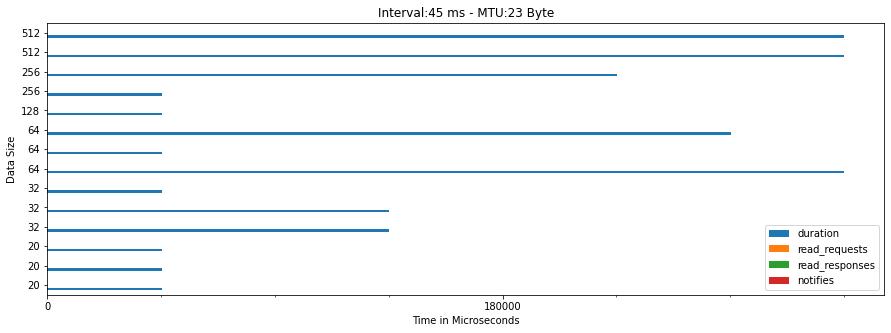

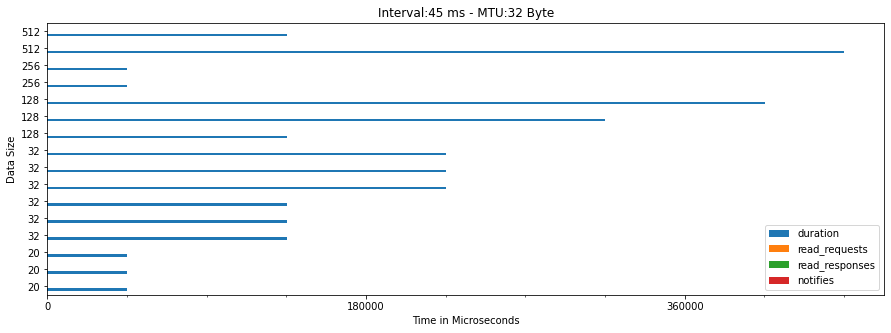

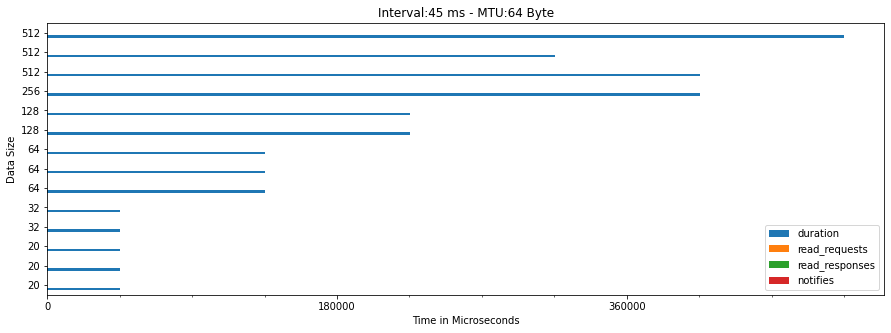

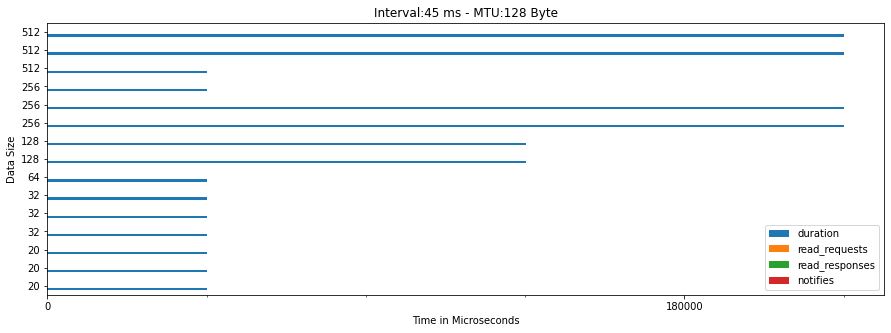

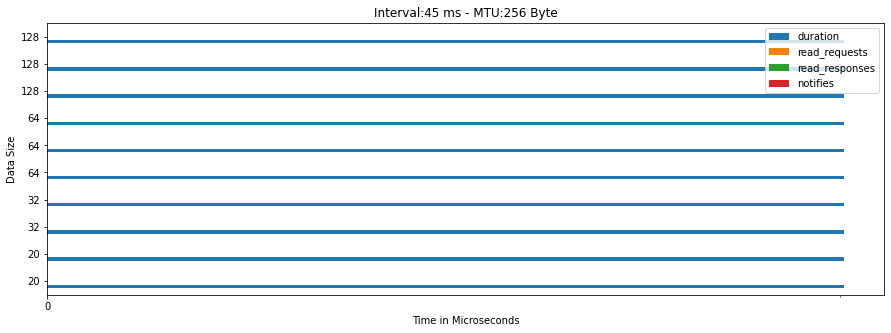

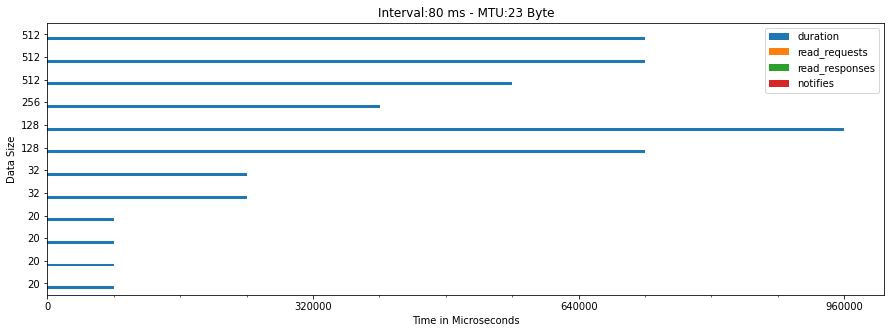

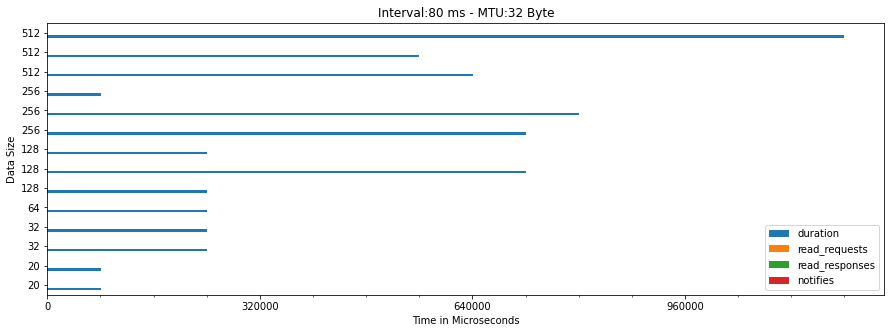

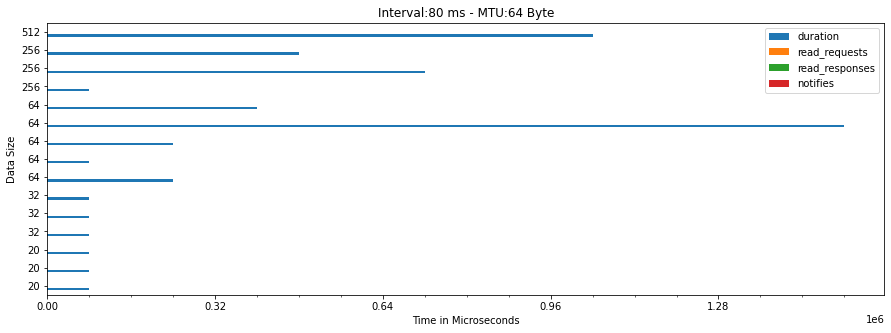

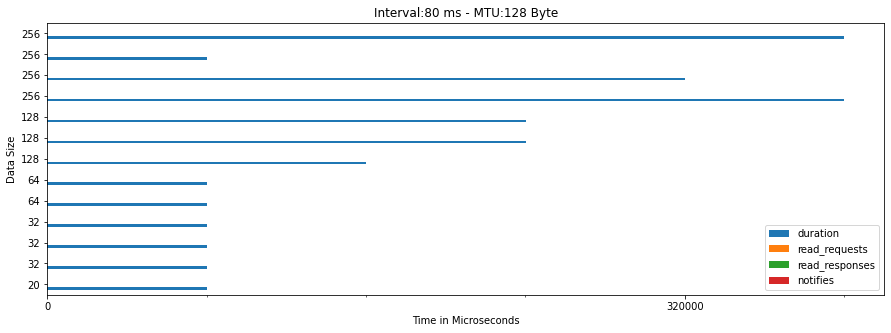

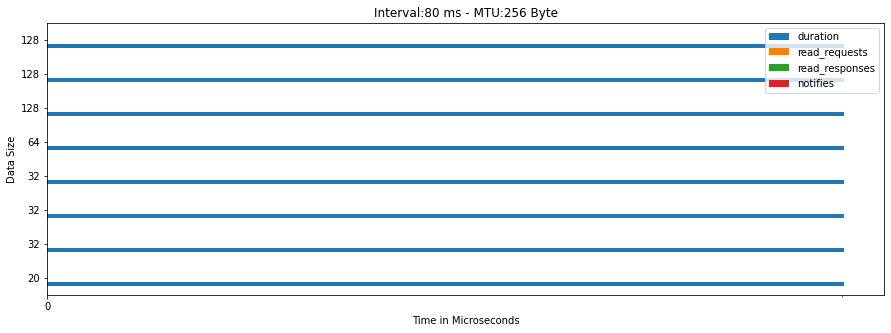

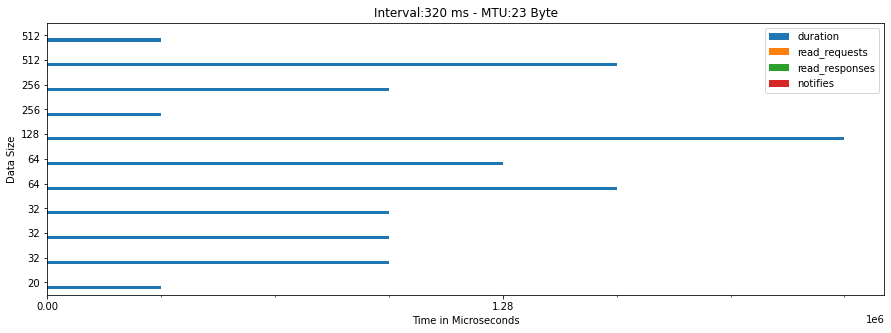

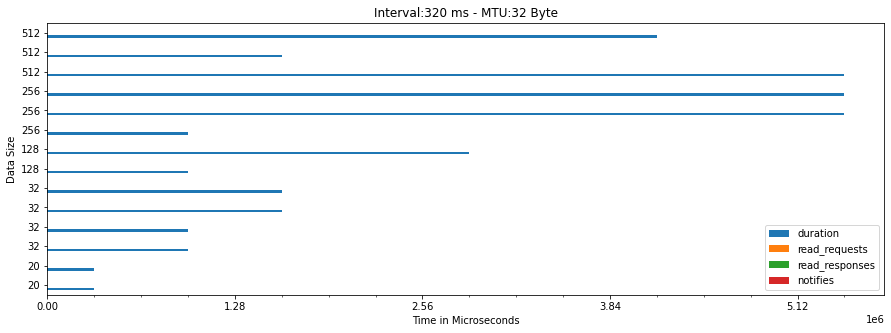

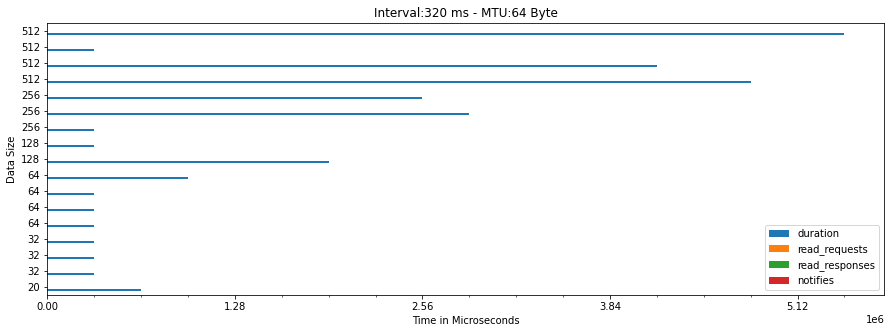

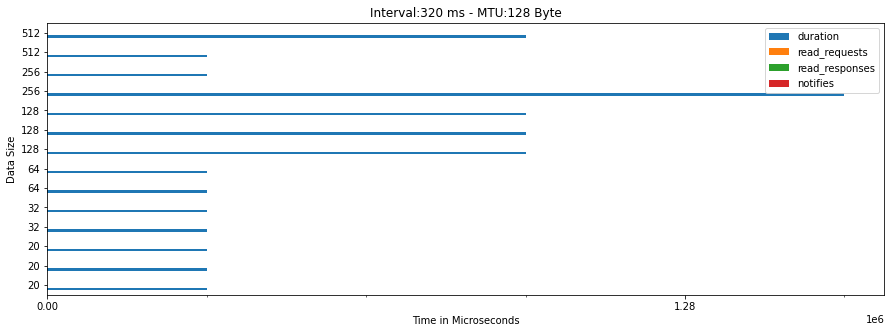

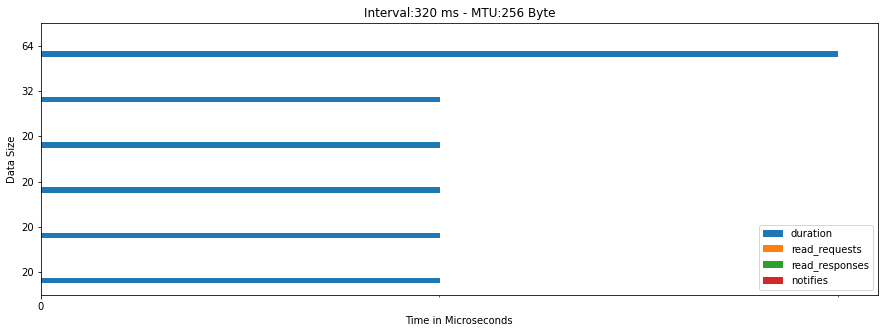

In [147]:
dfs =[(i,x) for i,x in dataframe.groupby("conn_interval")]
for interval,df in dfs:
    step = int(interval*1.25*1_000)
    # filtered:
    # df_sizes = [(s,x) for s,x in df[df["duration"] < df["duration"].max()*0.7].groupby("mtu_size")]
    # not filtered:
    df_sizes = [(s,x) for s,x in df.groupby("mtu_size")]
    for size,df_size in df_sizes:
        bigest_data_size = df_size["data_size"].max()
        biggest_duration_for_max_data = df_size[df_size["data_size"] == bigest_data_size]['duration'].mean()*1.5
        df_size = df_size[df_size['duration'] < biggest_duration_for_max_data]
        
        xticks = range(0,step*int(df_size['duration'].max()/step + 2),step*4)
        subplot = df_size.drop(["mtu_size","conn_interval"],axis=1).set_index(["data_size"]).plot.barh(figsize=(15,5))
        subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step*4))
        subplot.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
        subplot.set_aspect("auto")
        subplot.set_ylabel("Data Size")
        subplot.set_xlabel("Time in Microseconds")
        subplot.set_title("Interval:%d ms - MTU:%d Byte"%(int(interval*1.25),int(size)))

VGL Duration OTA / HCI
Interval = 45
MTU = 32
SIZE = 128

In [148]:
df.columns

Index(['request_type', 'duration', 'data_size', 'mtu_size', 'conn_interval',
       'data', 'read_requests', 'read_responses', 'notifies'],
      dtype='object')

In [149]:
df_compare = df[df['data_size'] == 128]
df_compare


,request_type,duration,data_size,mtu_size,conn_interval,data,read_requests,read_responses,notifies
149,READ Req,2240267,128,23,256,Data Size 128nopqrstuvwxyzabcdefghijklmnopqrst...,4,4,0
150,READ Req,3520291,128,23,256,Data Size 128nopqrstuvwxyzabcdefghijklmnopqrst...,6,6,0
151,READ Req,3520286,128,23,256,Data Size 128nopqrstuvwxyzabcdefghijklmnopqrst...,6,6,0
163,READ Req,960257,128,32,256,Dafg,2,2,0
164,READ Req,2880286,128,32,256,Dafgklpquvwx,5,5,0
179,READ Req,1920288,128,64,256,Dalmwx,3,3,0
180,READ Req,320234,128,64,256,Da,1,1,0
195,READ Req,960242,128,128,256,Dax,2,2,0
196,READ Req,960255,128,128,256,Dax,2,2,0
197,READ Req,960241,128,128,256,Dax,2,2,0


### Find Request

In [150]:
dataframe[dataframe["request_type"].str.contains("WRITE")]

,request_type,duration,data_size,mtu_size,conn_interval,data,read_requests,read_responses,notifies


In [151]:
mtu_size = 23
data_size = 512
conn_int = 36
request_type = "WRITE"
match = None
for r in all_requests:
    if r.mtu_size == mtu_size and r.data_size == data_size and r.conn_interval == conn_int and request_type in r.request_type:
        print(r.request_type)
        match = r.df

In [152]:
match.drop(["Length","Info","No.","Request in Frame","Time"],axis=1)

AttributeError: 'NoneType' object has no attribute 'drop'